In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Customer-Churn-Prediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df1 = pd.read_csv('supershops.csv')
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [7]:
df1.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [8]:
df1.Transport = df1.Transport.fillna(df1.Transport.mean())
df1.loc[19]

Marketing Spend          86419.7
Administration         153514.11
Transport          215331.732449
Area                       Dhaka
Profit                 122776.86
Name: 19, dtype: object

# Basic visualization using Seaborn library

<AxesSubplot:xlabel='Churn', ylabel='count'>

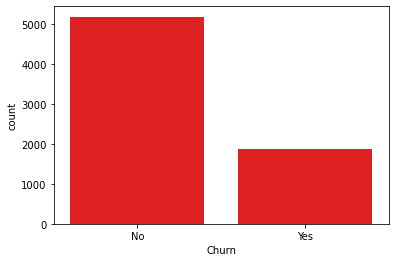

In [9]:
sns.countplot(df['Churn'],color='red')

In [10]:
#drop duplicate before oversampling
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='count', ylabel='gender'>

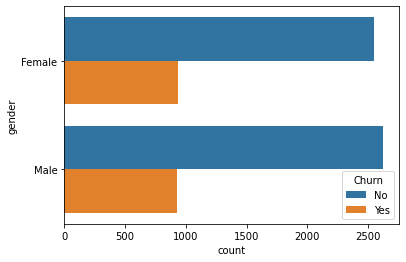

In [11]:
#Basic Visualization using Seaborn Library
sns.countplot(y='gender',hue='Churn',data = df)

<AxesSubplot:xlabel='gender', ylabel='count'>

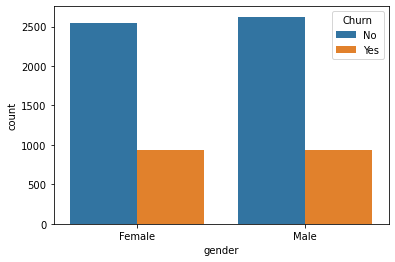

In [12]:
sns.countplot(x='gender',hue='Churn',data = df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

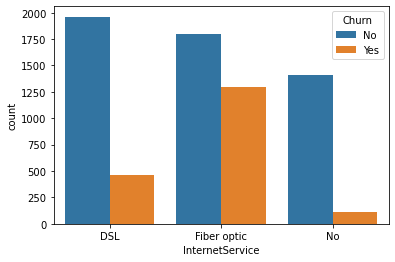

In [13]:
sns.countplot(x='InternetService',hue='Churn',data = df)

In [14]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

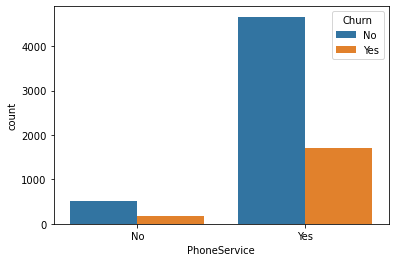

In [15]:
sns.countplot(x='PhoneService',hue='Churn',data = df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

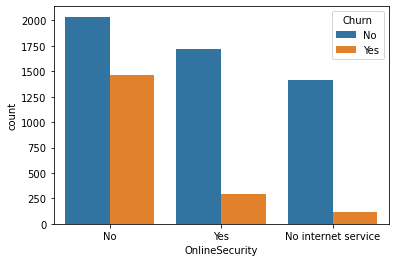

In [16]:
sns.countplot(x='OnlineSecurity',hue='Churn',data = df)

In [17]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

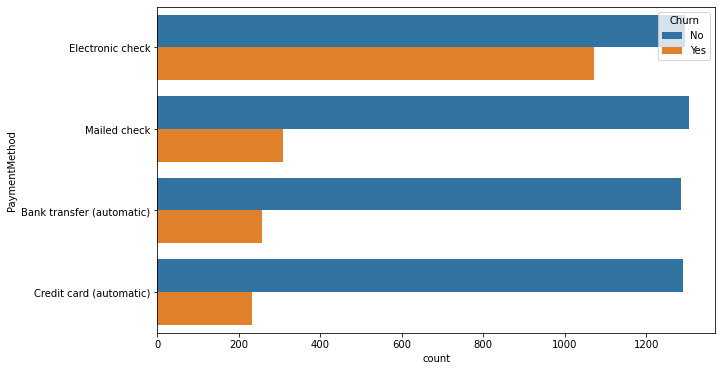

In [18]:
plt.subplots(figsize=(10,6))
sns.countplot(y='PaymentMethod',hue='Churn',data=df)

# Preprocess the dataset

In [19]:
#drop customer id
df = df.drop('customerID',axis=1)
df.shape
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode the dataset

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])
        

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# separate x,y

In [21]:
x = df.drop('Churn',axis=1)
y = df[['Churn']]

# Imbalanced Data Handling

In [22]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [23]:
not_churned = (5174/(5174+1869)) *100
churned = (1869/(5174+1869)) *100

print(f'Not churned {not_churned} percent of total people')
print(f'Not churned {churned} percent of total people')

Not churned 73.4630129206304 percent of total people
Not churned 26.536987079369588 percent of total people


# Sinthetic Minority Oversampling Technique (SMOTETomek)

In [24]:
!pip install imblearn

In [25]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=100)

In [26]:
y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [27]:
X,Y = sm.fit_resample(x,y)

In [28]:
for col in df.columns:
   print(f'{col} null value = {df[col].isnull().sum()}')

gender null value = 0
SeniorCitizen null value = 0
Partner null value = 0
Dependents null value = 0
tenure null value = 0
PhoneService null value = 0
MultipleLines null value = 0
InternetService null value = 0
OnlineSecurity null value = 0
OnlineBackup null value = 0
DeviceProtection null value = 0
TechSupport null value = 0
StreamingTV null value = 0
StreamingMovies null value = 0
Contract null value = 0
PaperlessBilling null value = 0
PaymentMethod null value = 0
MonthlyCharges null value = 0
TotalCharges null value = 0
Churn null value = 0


In [29]:
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)

In [30]:
df.TotalCharges.isnull().sum()

0

In [31]:
X,Y = sm.fit_resample(x,y)

In [32]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
X.shape

(9648, 19)

In [34]:
Y.shape

(9648, 1)

In [35]:
Y.head()

,Churn
0,0
1,0
2,1
3,1
4,0


# Near miss for Under sampling

In [36]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
new_x,new_y = nm.fit_resample(x,y)

In [37]:
new_x.shape

(3738, 19)

In [38]:
new_y.shape

(3738, 1)

# Over Sampling

In [39]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42)
new_x_o,new_y_o = os.fit_resample(x,y)

In [40]:
new_x_o.shape

(10348, 19)

In [41]:
new_y_o.shape

(10348, 1)

# Hold Out Cross Validation

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=42,test_size=.25)
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3297,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.350000,1613
6472,0,0,0,0,40,1,2,1,0,2,2,0,2,0,0,1,0,93.400000,3226
8768,0,0,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,74.234879,5715
104,1,0,1,1,27,1,2,1,0,2,0,2,0,0,0,1,1,85.200000,1769
3123,1,1,1,0,1,1,2,1,0,0,0,0,2,2,0,1,2,95.100000,6442


In [43]:
train,test = train_test_split(df,train_size=.80,random_state=42)
train.to_csv('churn_train_set.csv')

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtest,ytest)

0.8038971807628524

# Without sampling

In [45]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=.25,random_state=42)
dtc.fit(xtrain1,ytrain1)
dtc.score(xtest1,ytest1)

0.7331061896649631

# XGBoost Classifier

In [46]:
!pip install xgboost

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
xgb.score(xtest,ytest)

0.8660862354892206

In [48]:
#without sampling xgb
xgb.fit(xtrain1,ytrain1)
xgb.score(xtest1,ytest1)

0.7910278250993753

In [49]:
!pip install ada-boost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(xtrain,ytrain)
adb.score(xtest,ytest)

0.8474295190713101

In [51]:
#without sampling ada-boost
adb.fit(xtrain1,ytrain1)
adb.score(xtest1,ytest1)

0.797274275979557

# KFold Cross Validation

In [52]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
result = cross_val_score(xgb,X,Y,cv=kfold)

In [53]:
result

array([0.86321244, 0.85284974, 0.85803109, 0.86314152, 0.86158631])

In [54]:
result.mean()

0.859764220501374

In [55]:
result.max()

0.8632124352331606

In [56]:
result.min()

0.8528497409326425

# Stratified KFold Cross Validation

In [57]:
from sklearn.model_selection import StratifiedKFold
stf = StratifiedKFold(n_splits=5)
result2 = cross_val_score(xgb,X,Y,cv=stf)
result2

array([0.73056995, 0.79274611, 0.90466321, 0.90720581, 0.91550026])

In [58]:
result2.max()

0.9155002592016589

In [59]:
result2.min()

0.7305699481865285

In [60]:
result2.mean()

0.8501370679860434

# Leave One Out Cross Validation

In [61]:
from sklearn.model_selection import LeaveOneOut
leo = LeaveOneOut()
result3 = cross_val_score(xgb,X,Y,cv=leo)
result3

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
result3.mean()

0.8646351575456053